## **ESTUDO DE MANIPULAÇÃO DE DADOS POR TRANSFORMADA RÁPIDA DE FOURIER (FFT) POR JANELAS DESLIZANTES**

DE ACORDO COM https://pythontic.com/visualization/signals/fouriertransform_fft:

- Fourier transform is one of the most applied concepts in the world of Science and Digital Signal Processing.
- Fourier transform provides the frequency domain representation of the original signal.
- For example, given a sinusoidal signal which is in time domain the Fourier Transform provides the constituent signal frequencies.
- Using Fourier transform both periodic and non-periodic signals can be transformed from time domain to frequency domain.


O ARTIGO APRESENTANDO EM (https://towardsdatascience.com/fast-fourier-transform-937926e591cb):
- MOSTRA A MATEMÁTICA PARA O DESENVOLVIMENTO A TRANSFORMADA RÁPIDA NO DOMÍNIO DE TEMPO DISCRETO. UMA IMPORTANTE CONCLUSAO DESTE ARTIGO É A POSSIBILIADE DA IMPLEMENTAÇÃO DA FUNÇÃO POR ESCRITA DIRETA EM PYTHON, USAR A FUNÇÃO DO NUMPY OU USAR A FUNÇÃO O SCIPY. A PARTIR DO ARTIGO PODE-SE PERCEBER QUE A FUNÇÃO CRIADA EM SCIPY CONSISTE NA FUNÇÃO DE MELHOR DESEMPENHO E PORTANTO A ESCOLHA PARA ESTE TRABALHO.
 
TUTORIAL UTILIZADO PARA A IMPLEMENTAÇÃO EM CÓDIGO:

https://realpython.com/python-scipy-fft/ 

EBOOK PARA REFERÊNCIA TEÓRICA (CAP. 24):

https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html

CAPÍTULO PARA REFERÊNCIA TEÓRICA:

https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html

CONCEITOS ESSENCIAIS:

- TAXA DE AMOSTRAGEM https://pt.wikipedia.org/wiki/Taxa_de_amostragem
- TEOREMA DE NYQUIST https://pt.wikipedia.org/wiki/Teorema_da_amostragem_de_Nyquist%E2%80%93Shannon
- JANELAMENTO FFT 
-- https://www.youtube.com/watch?v=T9x2rvdhaIE
-- https://en.wikipedia.org/wiki/Window_function

IMPLEMENTAÇÃO DA TÉCNICA DE JANELAMENTO DA FFT: https://flothesof.github.io/FFT-window-properties-frequency-analysis.html

In [54]:
# Python example - Fourier transform using numpy.fft method
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

### CÓDIGO EXEMPLO

Passo 1. Criando sinal senoidal para análise a partir da soma de duas ondas senoidais com amplitude e frequencias diferentes:

In [5]:
# How many time points are needed per seconds i,e., Sampling Frequency
samplingFrequency = 100;

# At what intervals time points are sampled
samplingInterval = 1 / samplingFrequency;

# Begin time period of the signals
beginTime = 0;

# End time period of the signals
endTime = 10; 

# Frequency of the signals
signal1Frequency     = 4;
signal2Frequency     = 20;

# Time points
time = np.arange(beginTime, endTime, samplingInterval);

# Create two sine waves
amplitude1 = np.sin(2*np.pi*signal1Frequency*time)
amplitude2 = 0.5*np.sin(2*np.pi*signal2Frequency*time)

# Add the sine waves
amplitude = amplitude1 + amplitude2

Passo 2. Definindo os gráficos para componente, forma de onda a ser transformada e resultado apresentando pela FFT:

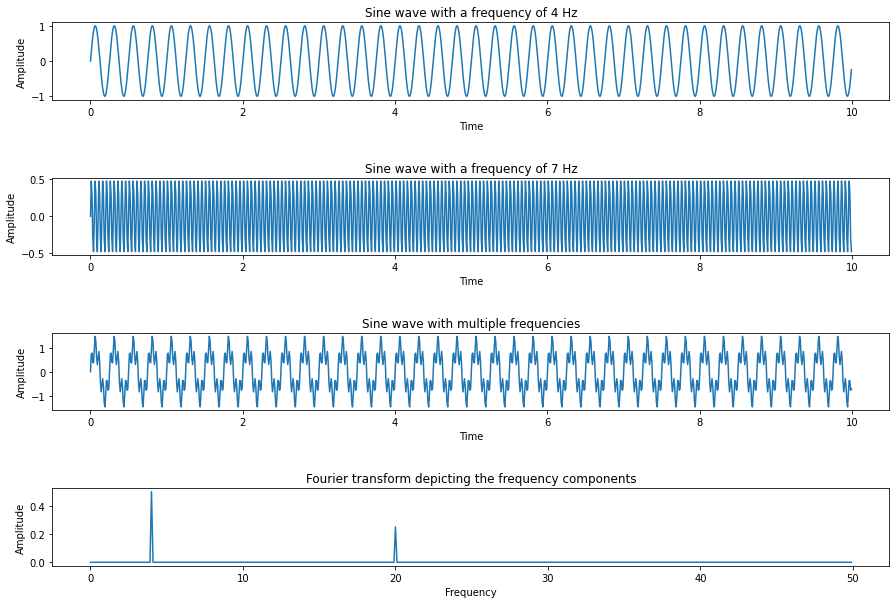

In [12]:
# Create subplot
figure, axis = plt.subplots(4, 1,figsize=(15,10))
plt.subplots_adjust(hspace=1)

# Time domain representation for sine wave 1
axis[0].set_title('Sine wave with a frequency of 4 Hz')
axis[0].plot(time, amplitude1)
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Amplitude')

# Time domain representation for sine wave 2
axis[1].set_title('Sine wave with a frequency of 7 Hz')
axis[1].plot(time, amplitude2)
axis[1].set_xlabel('Time')
axis[1].set_ylabel('Amplitude')

# Time domain representation of the resultant sine wave
axis[2].set_title('Sine wave with multiple frequencies')
axis[2].plot(time, amplitude)
axis[2].set_xlabel('Time')
axis[2].set_ylabel('Amplitude')

# Frequency domain representation
fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

tpCount     = len(amplitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

# Frequency domain representation
axis[3].set_title('Fourier transform depicting the frequency components')
axis[3].plot(frequencies, abs(fourierTransform))
axis[3].set_xlabel('Frequency')
axis[3].set_ylabel('Amplitude')
plt.show()

A implementação anterior utiliza-se do numpy para a transformação. A utilização das bibliotecas numpy e scipy são bastante similares como apresentado abaixo, com a diferença que a função em Scipy é mais eficiente. Um ponto importante na definição a FFT é a taxa de amostragem que corresponde a quantas amostras por segundo foram realizadas para formar o sinal de onda em análise.

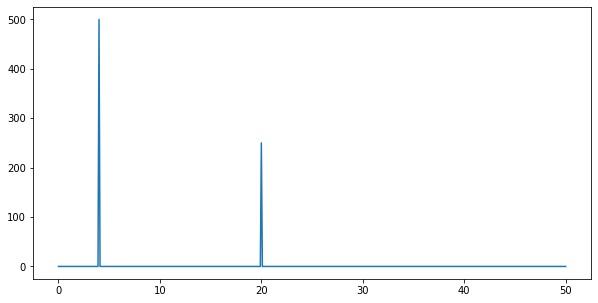

In [15]:
normalized_tone = amplitude

SAMPLE_RATE = samplingFrequency
DURATION = endTime

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.figure(figsize=(10,5))
plt.plot(xf, np.abs(yf))
plt.show()

Implementando um filtro simples na FFT:

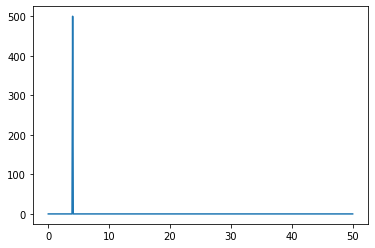

In [17]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 15 Hz
target_idx = int(points_per_freq * 20)
yf[target_idx - 1 : target_idx + 2] = 0

plt.plot(xf, np.abs(yf))
plt.show()


Breve estudo sobre o método de janelamento.

Para sinais curtos, os efeitos de borda podem distorcer significativamente o espectro de potência dos sinais, uma vez que estamos assumindo que nosso sinal é periódico. O uso de janelas afiladas nas bordas pode eliminar esses artefatos de borda e também pode ser usado para eliminar o deslocamento em um sinal.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.hann.html


In [1]:
from scipy import signal
from scipy.fft import fft, fftshift
window = signal.windows.hamming(101)
plt.plot(window)
plt.title("hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

NameError: name 'plt' is not defined

Text(0.5, 0, 'Normalized frequency [cycles per sample]')

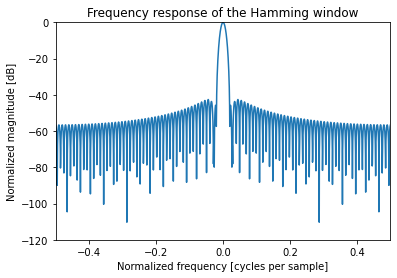

In [36]:
plt.figure()

A = fft(window, 2048) / (len(window)/2.0)

freq = np.linspace(-0.5, 0.5, len(A))

response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))

plt.plot(freq, response)

plt.axis([-0.5, 0.5, -120, 0])

plt.title("Frequency response of the Hamming window")

plt.ylabel("Normalized magnitude [dB]")

plt.xlabel("Normalized frequency [cycles per sample]")

Sobre o uso de janelas no processamento digital de sinais

https://flothesof.github.io/FFT-window-properties-frequency-analysis.html

Uma única senóide

Como uma primeira etapa, veremos o efeito de diferentes janelas na transformada de Fourier de uma única senoide. Vamos gerar nossos dados de amostra e examiná-los.


In [39]:
from scipy.signal import get_window

Text(0.5, 1.0, 'sinusoid, 1000 samples, sampling rate 500.0 Hz')

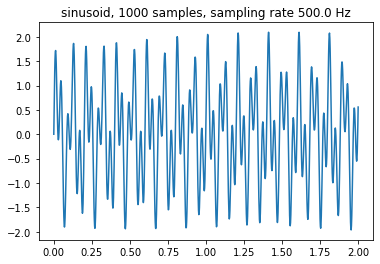

In [52]:
t = np.arange(0, 2, step=1/500)
m = t.size
s = np.sin(2 * np.pi * 10.1 * t) + np.sin(2 * np.pi * 25 * t)+ 0.1*np.sin(2 * np.pi * 30 * t)
plt.plot(t, s)
plt.title("sinusoid, {} samples, sampling rate {} Hz".format(m, 1/(t[1] - t[0])))

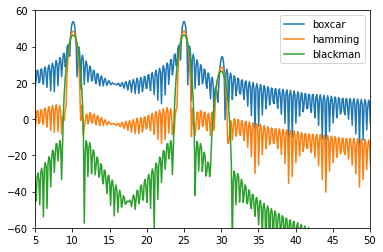

In [53]:
for window in ['boxcar', 'hamming', 'blackman']:
    n = 4096
    w = np.fft.rfft(s * get_window(window, m), n=n)
    freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
    plt.plot(freqs, 20*np.log10(np.abs(w)), label=window)
plt.ylim(-60, 60)
plt.xlim(5, 50)
plt.legend()

Para continuar veja o jupyter 4_FFT...